# Homework 1

## Instructions

First, ensure you have cloned the [course repository](https://github.com/lydiaYchen/DDL24Spring).

Then, open the [interactive notebook version](https://github.com/lydiaYchen/DDL24Spring/blob/main/lab/hw-hfl.ipynb) of this homework from your local clone.

Further, complete the homework by filling in the code and answers and save your changes.

Finally, upload the notebook to the assignment in ILIAS.

## Note

When not otherwise specified, use the following parameter values in experiment runs:
- `nr_clients` (N): 100
- `lr`: 0.01
- `client_fraction`(C): 0.1
- `nr_local_epochs` (E): 1
- `batch_size` (B): 100
- `nr_rounds`: 10
- `iid`: True

For all exercises, pass `seed = 10` to calls for splitting data, server initialization, or plotting.

In [2]:
import pandas as pd
import seaborn as sns
from base import *
from IPython.display import display
from typing import List, Dict, Tuple

n = 100
lr = 0.01
c = 0.1
e = 1
b = 100
nr_rounds = 10
iid = True
seed = 10

## Exercise 1 - FedSGD with weights (3 points)

### Question

_(2 points)_ Implement a version of FedSGD that uses weights in its updates, like FedAvg, instead of the gradients from the version of the tutorials. The two FedSGD versions should have the same test accuracy after each round (with a tolerance of at most 0.02%). To show this, compare their output for the following two scenarios over *5 rounds*:
- `lr = 0.01, client_subsets = split(100, True, ...), client_fraction = 0.5`
- `lr = 0.1, client_subsets = split(50, False, ...), client_fraction = 0.2`

*Tip:* You can use the existing FedAvg implementation to minimize the amount of code writing required.

_(1 point)_ Explain in which cases (about the different parameters for decentralized learning) the two are equivalent.

### Answer

In [3]:
case1 = {"lr": 0.01, "client_subsets": split(100, True, seed), "client_fraction": 0.5, "seed": seed}
case2 = {"lr": 0.1, "client_subsets": split(50, False, seed), "client_fraction": 0.2, "seed": seed}

batch_size_fed_sgd = lambda n_clients: int(len(train_dataset) / n_clients)

fedavg_server = FedAvgServer(**case1, batch_size=batch_size_fed_sgd(100), nr_local_epochs=1)
fedavg_server.name = "FedSGD"
result_fed_avg = fedavg_server.run(nr_rounds)
fed_avg_df = result_fed_avg.as_df()
display(fed_avg_df)

fedsgd_gradient_server = FedSgdGradientServer(**case1)
result_fedsgd_gradient = fedsgd_gradient_server.run(nr_rounds)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
display(fedsgd_gradient_df)

fedavg_server = FedAvgServer(**case2, batch_size=batch_size_fed_sgd(50), nr_local_epochs=1)
fedavg_server.name = "FedSGD"
result_fed_avg = fedavg_server.run(nr_rounds)
fed_avg_df = result_fed_avg.as_df()
display(fed_avg_df)

fedsgd_gradient_server = FedSgdGradientServer(**case2)
result_fedsgd_gradient = fedsgd_gradient_server.run(nr_rounds)
fedsgd_gradient_df = result_fedsgd_gradient.as_df()
display(fedsgd_gradient_df)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGD,100,0.5,600,1,0.01,10,100,8.91
1,2,FedSGD,100,0.5,600,1,0.01,10,200,13.42
2,3,FedSGD,100,0.5,600,1,0.01,10,300,18.44
3,4,FedSGD,100,0.5,600,1,0.01,10,400,23.01
4,5,FedSGD,100,0.5,600,1,0.01,10,500,27.58
5,6,FedSGD,100,0.5,600,1,0.01,10,600,31.78
6,7,FedSGD,100,0.5,600,1,0.01,10,700,35.83
7,8,FedSGD,100,0.5,600,1,0.01,10,800,39.02
8,9,FedSGD,100,0.5,600,1,0.01,10,900,41.42
9,10,FedSGD,100,0.5,600,1,0.01,10,1000,43.44


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.5,∞,1,0.01,10,100,8.91
1,2,FedSGDGradient,100,0.5,∞,1,0.01,10,200,13.42
2,3,FedSGDGradient,100,0.5,∞,1,0.01,10,300,18.44
3,4,FedSGDGradient,100,0.5,∞,1,0.01,10,400,23.01
4,5,FedSGDGradient,100,0.5,∞,1,0.01,10,500,27.58
5,6,FedSGDGradient,100,0.5,∞,1,0.01,10,600,31.78
6,7,FedSGDGradient,100,0.5,∞,1,0.01,10,700,35.83
7,8,FedSGDGradient,100,0.5,∞,1,0.01,10,800,39.02
8,9,FedSGDGradient,100,0.5,∞,1,0.01,10,900,41.42
9,10,FedSGDGradient,100,0.5,∞,1,0.01,10,1000,43.44


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGD,50,0.2,1200,1,0.1,10,20,15.51
1,2,FedSGD,50,0.2,1200,1,0.1,10,40,24.65
2,3,FedSGD,50,0.2,1200,1,0.1,10,60,13.57
3,4,FedSGD,50,0.2,1200,1,0.1,10,80,20.00
4,5,FedSGD,50,0.2,1200,1,0.1,10,100,40.27
5,6,FedSGD,50,0.2,1200,1,0.1,10,120,44.75
6,7,FedSGD,50,0.2,1200,1,0.1,10,140,37.93
7,8,FedSGD,50,0.2,1200,1,0.1,10,160,18.63
8,9,FedSGD,50,0.2,1200,1,0.1,10,180,13.47
9,10,FedSGD,50,0.2,1200,1,0.1,10,200,57.25


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,50,0.2,∞,1,0.1,10,20,15.51
1,2,FedSGDGradient,50,0.2,∞,1,0.1,10,40,24.65
2,3,FedSGDGradient,50,0.2,∞,1,0.1,10,60,13.57
3,4,FedSGDGradient,50,0.2,∞,1,0.1,10,80,20.00
4,5,FedSGDGradient,50,0.2,∞,1,0.1,10,100,40.27
5,6,FedSGDGradient,50,0.2,∞,1,0.1,10,120,44.75
6,7,FedSGDGradient,50,0.2,∞,1,0.1,10,140,37.93
7,8,FedSGDGradient,50,0.2,∞,1,0.1,10,160,18.63
8,9,FedSGDGradient,50,0.2,∞,1,0.1,10,180,13.47
9,10,FedSGDGradient,50,0.2,∞,1,0.1,10,200,57.25


FedAvg is a generalization of FedSGD, where the weights are used to average the updates from the clients. In terms of the hyperparameters, the two are equivalent when E=1 and B=$\infty$, meaning that the clients perform only one local epoch and use all their data for the update.

## Exercise 2 - Client number & fraction (4 points)

### Question

_(2 points)_ Run the necessary experiments to fill in the following table showing the final message count and test accuracy of FedSGD and FedAvg for different total client numbers:

| Algorithm | N   | C   | Message count | Test accuracy |
| --------- | --- | --- | ------------- | ------------- |
| FedSGD    | 10  | 0.1 |       20        |      43.23         |
| FedAvg    | 10  | 0.1 |        20       |        93.13       |
| FedSGD    | 50  | 0.1 |        100       |        43.11       |
| FedAvg    | 50  | 0.1 |        100       |         87.95      |
| FedSGD    | 100 | 0.1 |        200       |          43.17     |
| FedAvg    | 100 | 0.1 |         200      |          81.34     |

Is the relationship between the metrics and client numbers monotonous?  
*A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases.*
- FedSGD: As the number of clients increases, the test accuracy do not seem to increase or deacrease so the relationship is not monotonous.
- FedAvg: As the number of clients increases, the test accuracy decreases so the relationship seems to be monotonous.

_(2 points)_ Run the experiments to fill in the table when varying the fraction of clients used in every round:

| Algorithm | N   | C    | Message count | Test accuracy |
| --------- | --- | ---- | ------------- | ------------- |
| FedSGD    | 100 | 0.01 |        20       |      41.90         |
| FedAvg    | 100 | 0.01 |       20        |         73.42      |
| FedSGD    | 100 | 0.1  |       200        |       43.17        |
| FedAvg    | 100 | 0.1  |        200       |        81.34       |
| FedSGD    | 100 | 0.2  |       400        |        42.88       |
| FedAvg    | 100 | 0.2  |        400       |         81.93      |

How does the observed pattern differ? *?from the previous table?*
- FedSGD: As the fraction of clients increases, the test accuracy seems to first increase but then decrease but only slightly so the relationship seems to be monotonous.
- FedAvg: As the fraction of clients increases alot first but then do not vary much so the relationship seems to be monotonous, at least at the beginning.

### Answer

In [4]:
Ns = [10, 50, 100]
C = 0.1
for N in Ns:
    dataset = split(N, iid, seed)
    params = {"lr": lr, "client_subsets": dataset, "client_fraction": C, "seed": seed}
    
    fed_sgd = FedSgdGradientServer(**params)
    result_fed_sgd = fed_sgd.run(nr_rounds)
    fed_sgd_df = result_fed_sgd.as_df()
    display(fed_sgd_df)

    fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=e)
    result_fed_avg = fedavg_server.run(nr_rounds)
    fed_avg_df = result_fed_avg.as_df()
    display(fed_avg_df)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,10,0.1,∞,1,0.01,10,2,9.28
1,2,FedSGDGradient,10,0.1,∞,1,0.01,10,4,14.01
2,3,FedSGDGradient,10,0.1,∞,1,0.01,10,6,18.99
3,4,FedSGDGradient,10,0.1,∞,1,0.01,10,8,23.00
4,5,FedSGDGradient,10,0.1,∞,1,0.01,10,10,27.40
5,6,FedSGDGradient,10,0.1,∞,1,0.01,10,12,31.12
6,7,FedSGDGradient,10,0.1,∞,1,0.01,10,14,35.87
7,8,FedSGDGradient,10,0.1,∞,1,0.01,10,16,39.08
8,9,FedSGDGradient,10,0.1,∞,1,0.01,10,18,41.88
9,10,FedSGDGradient,10,0.1,∞,1,0.01,10,20,43.23


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,10,0.1,100,1,0.01,10,2,75.00
1,2,FedAvg,10,0.1,100,1,0.01,10,4,86.48
2,3,FedAvg,10,0.1,100,1,0.01,10,6,89.03
3,4,FedAvg,10,0.1,100,1,0.01,10,8,90.60
4,5,FedAvg,10,0.1,100,1,0.01,10,10,91.18
5,6,FedAvg,10,0.1,100,1,0.01,10,12,91.72
6,7,FedAvg,10,0.1,100,1,0.01,10,14,92.30
7,8,FedAvg,10,0.1,100,1,0.01,10,16,92.90
8,9,FedAvg,10,0.1,100,1,0.01,10,18,92.21
9,10,FedAvg,10,0.1,100,1,0.01,10,20,93.13


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,50,0.1,∞,1,0.01,10,10,9.44
1,2,FedSGDGradient,50,0.1,∞,1,0.01,10,20,13.93
2,3,FedSGDGradient,50,0.1,∞,1,0.01,10,30,18.58
3,4,FedSGDGradient,50,0.1,∞,1,0.01,10,40,23.04
4,5,FedSGDGradient,50,0.1,∞,1,0.01,10,50,27.46
5,6,FedSGDGradient,50,0.1,∞,1,0.01,10,60,31.30
6,7,FedSGDGradient,50,0.1,∞,1,0.01,10,70,35.45
7,8,FedSGDGradient,50,0.1,∞,1,0.01,10,80,38.59
8,9,FedSGDGradient,50,0.1,∞,1,0.01,10,90,41.49
9,10,FedSGDGradient,50,0.1,∞,1,0.01,10,100,43.11


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,50,0.1,100,1,0.01,10,10,46.83
1,2,FedAvg,50,0.1,100,1,0.01,10,20,65.77
2,3,FedAvg,50,0.1,100,1,0.01,10,30,66.49
3,4,FedAvg,50,0.1,100,1,0.01,10,40,77.61
4,5,FedAvg,50,0.1,100,1,0.01,10,50,81.41
5,6,FedAvg,50,0.1,100,1,0.01,10,60,83.53
6,7,FedAvg,50,0.1,100,1,0.01,10,70,85.75
7,8,FedAvg,50,0.1,100,1,0.01,10,80,86.31
8,9,FedAvg,50,0.1,100,1,0.01,10,90,87.23
9,10,FedAvg,50,0.1,100,1,0.01,10,100,87.95


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34


In [5]:
Cs = [0.01, 0.1, 0.2]
dataset = split(n, iid, seed)
for C in Cs:
    params = {"lr": lr, "client_subsets": dataset, "client_fraction": C, "seed": seed}
    
    fed_sgd = FedSgdGradientServer(**params)
    result_fed_sgd = fed_sgd.run(nr_rounds)
    fed_sgd_df = result_fed_sgd.as_df()
    display(fed_sgd_df)

    fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=e)
    result_fed_avg = fedavg_server.run(nr_rounds)
    fed_avg_df = result_fed_avg.as_df()
    display(fed_avg_df)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.01,∞,1,0.01,10,2,9.93
1,2,FedSGDGradient,100,0.01,∞,1,0.01,10,4,14.73
2,3,FedSGDGradient,100,0.01,∞,1,0.01,10,6,20.31
3,4,FedSGDGradient,100,0.01,∞,1,0.01,10,8,24.43
4,5,FedSGDGradient,100,0.01,∞,1,0.01,10,10,27.92
5,6,FedSGDGradient,100,0.01,∞,1,0.01,10,12,32.34
6,7,FedSGDGradient,100,0.01,∞,1,0.01,10,14,36.81
7,8,FedSGDGradient,100,0.01,∞,1,0.01,10,16,39.49
8,9,FedSGDGradient,100,0.01,∞,1,0.01,10,18,41.79
9,10,FedSGDGradient,100,0.01,∞,1,0.01,10,20,41.90


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.01,100,1,0.01,10,2,30.59
1,2,FedAvg,100,0.01,100,1,0.01,10,4,45.48
2,3,FedAvg,100,0.01,100,1,0.01,10,6,44.84
3,4,FedAvg,100,0.01,100,1,0.01,10,8,58.70
4,5,FedAvg,100,0.01,100,1,0.01,10,10,64.96
5,6,FedAvg,100,0.01,100,1,0.01,10,12,67.14
6,7,FedAvg,100,0.01,100,1,0.01,10,14,62.05
7,8,FedAvg,100,0.01,100,1,0.01,10,16,72.58
8,9,FedAvg,100,0.01,100,1,0.01,10,18,70.94
9,10,FedAvg,100,0.01,100,1,0.01,10,20,73.42


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.2,∞,1,0.01,10,40,8.90
1,2,FedSGDGradient,100,0.2,∞,1,0.01,10,80,13.77
2,3,FedSGDGradient,100,0.2,∞,1,0.01,10,120,18.33
3,4,FedSGDGradient,100,0.2,∞,1,0.01,10,160,23.13
4,5,FedSGDGradient,100,0.2,∞,1,0.01,10,200,27.42
5,6,FedSGDGradient,100,0.2,∞,1,0.01,10,240,31.96
6,7,FedSGDGradient,100,0.2,∞,1,0.01,10,280,35.64
7,8,FedSGDGradient,100,0.2,∞,1,0.01,10,320,39.07
8,9,FedSGDGradient,100,0.2,∞,1,0.01,10,360,40.97
9,10,FedSGDGradient,100,0.2,∞,1,0.01,10,400,42.88


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.2,100,1,0.01,10,40,31.12
1,2,FedAvg,100,0.2,100,1,0.01,10,80,45.02
2,3,FedAvg,100,0.2,100,1,0.01,10,120,55.71
3,4,FedAvg,100,0.2,100,1,0.01,10,160,60.69
4,5,FedAvg,100,0.2,100,1,0.01,10,200,65.15
5,6,FedAvg,100,0.2,100,1,0.01,10,240,71.39
6,7,FedAvg,100,0.2,100,1,0.01,10,280,73.32
7,8,FedAvg,100,0.2,100,1,0.01,10,320,74.54
8,9,FedAvg,100,0.2,100,1,0.01,10,360,80.41
9,10,FedAvg,100,0.2,100,1,0.01,10,400,81.93


## Exercise 3 - Batch size & learning rate (4 points)

### Question

_(2 points)_ Complete the following table with the last-round wall time and test accuracy of FedAvg under different batch sizes:

| Algorithm | B   | η    | Wall time | Test accuracy |
| --------- | --- | ---- | --------- | ------------- |
| FedAvg    | 10  | 0.01 |     6.0      |      92.24         |
| FedAvg    | 100 | 0.01 |      1.3   |        81.34       |
| FedAvg    | 500 | 0.01 |    1.1      |         59.74      |

What is the trade-off for larger batch sizes?

*Note:* The exact measured time will differ from run to run, even on the same machine, but the trends should remain the same. Furthermore, the effect of batch size on wall time is less pronounced and, depending on the exact hardware is sometimes minimal when running on CPU instead of GPU.

As the batch size increases, the wall time decreases because the model converges faster. However, the test accuracy decreases because we update the model by averaging the gradients of the batch which may lead to a less accurate update.

_(2 points)_ Add the corresponding values for varying learning rates, also for FedSGD, in the table below:

| Algorithm | B   | η     | Wall time | Test accuracy |
| --------- | --- | ----- | --------- | ------------- |
| FedSGD    | ∞   | 0.001 |     2.6      |        8.87       |
| FedAvg    | 100 | 0.001 |      1.6     |       31.81        |
| FedSGD    | ∞   | 0.01  |       1.2     |       43.17        |
| FedAvg    | 100 | 0.01  |      1.1     |        81.34       |
| FedSGD    | ∞   | 1.0   |    1.2     |        11.35       |
| FedAvg    | 100 | 1.0   |      1.8    |        70.51       |

Does the learning rate influence the wall time? For accuracy, how does it change the value obtained within the set number of rounds? Can it impact the model's convergence?
- As the learning rate increases, the wall tends to decrease. For accuracy, as the learning rate increases, the test accuracy tends to increase because the model converges faster. However, if the learning rate is too high, the model may not converge.

### Answer

In [7]:
Bs = [10, 100, 500]
dataset = split(n, iid, seed)
for B in Bs:
    params = {"lr": lr, "client_subsets": dataset, "client_fraction": c, "seed": seed}
    fedavg_server = FedAvgServer(**params, batch_size=B, nr_local_epochs=e)
    result_fed_avg = fedavg_server.run(nr_rounds)
    fed_avg_df = result_fed_avg.as_df()
    display(fed_avg_df)
    print(result_fed_avg)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,10,1,0.01,10,20,71.74
1,2,FedAvg,100,0.1,10,1,0.01,10,40,85.26
2,3,FedAvg,100,0.1,10,1,0.01,10,60,86.96
3,4,FedAvg,100,0.1,10,1,0.01,10,80,89.12
4,5,FedAvg,100,0.1,10,1,0.01,10,100,89.88
5,6,FedAvg,100,0.1,10,1,0.01,10,120,90.40
6,7,FedAvg,100,0.1,10,1,0.01,10,140,90.85
7,8,FedAvg,100,0.1,10,1,0.01,10,160,91.27
8,9,FedAvg,100,0.1,10,1,0.01,10,180,91.90
9,10,FedAvg,100,0.1,10,1,0.01,10,200,92.24


RunResult(algorithm='FedAvg', n=100, c=0.1, b=10, e=1, lr=0.01, seed=10, wall_time=[0.5, 1.1, 1.7, 2.3, 2.9, 3.5, 4.1, 4.7, 5.4, 6.0], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[71.74, 85.26, 86.96, 89.12, 89.88, 90.4, 90.85, 91.27, 91.9, 92.24])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.2, 0.4, 0.5, 0.7, 0.8, 1.0, 1.1, 1.2, 1.3], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[30.82, 46.46, 55.65, 62.25, 69.81, 72.92, 74.85, 77.12, 77.87, 81.34])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,500,1,0.01,10,20,14.42
1,2,FedAvg,100,0.1,500,1,0.01,10,40,24.13
2,3,FedAvg,100,0.1,500,1,0.01,10,60,31.83
3,4,FedAvg,100,0.1,500,1,0.01,10,80,38.46
4,5,FedAvg,100,0.1,500,1,0.01,10,100,43.58
5,6,FedAvg,100,0.1,500,1,0.01,10,120,46.06
6,7,FedAvg,100,0.1,500,1,0.01,10,140,47.98
7,8,FedAvg,100,0.1,500,1,0.01,10,160,53.46
8,9,FedAvg,100,0.1,500,1,0.01,10,180,55.17
9,10,FedAvg,100,0.1,500,1,0.01,10,200,59.74


RunResult(algorithm='FedAvg', n=100, c=0.1, b=500, e=1, lr=0.01, seed=10, wall_time=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[14.42, 24.13, 31.83, 38.46, 43.58, 46.06, 47.98, 53.46, 55.17, 59.74])


In [8]:
lrs = [0.001, 0.01, 1.0]
dataset = split(n, iid, seed)
for l in lrs:
    params = {"lr": l, "client_subsets": dataset, "client_fraction": c, "seed": seed}
    
    fed_sgd = FedSgdGradientServer(**params)
    result_fed_sgd = fed_sgd.run(nr_rounds)
    fed_sgd_df = result_fed_sgd.as_df()
    display(fed_sgd_df)
    print(result_fed_sgd)

    fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=e)
    result_fed_avg = fedavg_server.run(nr_rounds)
    fed_avg_df = result_fed_avg.as_df()
    display(fed_avg_df)
    print(result_fed_avg)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.1,∞,1,0.001,10,20,6.42
1,2,FedSGDGradient,100,0.1,∞,1,0.001,10,40,6.56
2,3,FedSGDGradient,100,0.1,∞,1,0.001,10,60,6.80
3,4,FedSGDGradient,100,0.1,∞,1,0.001,10,80,7.12
4,5,FedSGDGradient,100,0.1,∞,1,0.001,10,100,7.40
5,6,FedSGDGradient,100,0.1,∞,1,0.001,10,120,7.67
6,7,FedSGDGradient,100,0.1,∞,1,0.001,10,140,7.83
7,8,FedSGDGradient,100,0.1,∞,1,0.001,10,160,8.23
8,9,FedSGDGradient,100,0.1,∞,1,0.001,10,180,8.55
9,10,FedSGDGradient,100,0.1,∞,1,0.001,10,200,8.87


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=0.001, seed=10, wall_time=[0.1, 0.2, 0.4, 0.8, 1.3, 1.8, 2.2, 2.4, 2.5, 2.6], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[6.42, 6.56, 6.8, 7.12, 7.4, 7.67, 7.83, 8.23, 8.55, 8.87])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,0.001,10,20,7.69
1,2,FedAvg,100,0.1,100,1,0.001,10,40,9.93
2,3,FedAvg,100,0.1,100,1,0.001,10,60,12.63
3,4,FedAvg,100,0.1,100,1,0.001,10,80,15.42
4,5,FedAvg,100,0.1,100,1,0.001,10,100,18.74
5,6,FedAvg,100,0.1,100,1,0.001,10,120,21.51
6,7,FedAvg,100,0.1,100,1,0.001,10,140,23.91
7,8,FedAvg,100,0.1,100,1,0.001,10,160,26.66
8,9,FedAvg,100,0.1,100,1,0.001,10,180,28.90
9,10,FedAvg,100,0.1,100,1,0.001,10,200,31.81


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.001, seed=10, wall_time=[0.1, 0.3, 0.4, 0.7, 1.0, 1.2, 1.3, 1.4, 1.5, 1.6], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[7.69, 9.93, 12.63, 15.42, 18.74, 21.51, 23.91, 26.66, 28.9, 31.81])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[8.77, 13.57, 18.44, 23.18, 27.38, 31.35, 35.85, 39.06, 41.25, 43.17])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[30.82, 46.46, 55.65, 62.25, 69.81, 72.92, 74.85, 77.12, 77.87, 81.34])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedSGDGradient,100,0.1,∞,1,1.0,10,20,33.42
1,2,FedSGDGradient,100,0.1,∞,1,1.0,10,40,34.61
2,3,FedSGDGradient,100,0.1,∞,1,1.0,10,60,8.23
3,4,FedSGDGradient,100,0.1,∞,1,1.0,10,80,11.35
4,5,FedSGDGradient,100,0.1,∞,1,1.0,10,100,11.35
5,6,FedSGDGradient,100,0.1,∞,1,1.0,10,120,10.32
6,7,FedSGDGradient,100,0.1,∞,1,1.0,10,140,11.35
7,8,FedSGDGradient,100,0.1,∞,1,1.0,10,160,11.35
8,9,FedSGDGradient,100,0.1,∞,1,1.0,10,180,11.56
9,10,FedSGDGradient,100,0.1,∞,1,1.0,10,200,11.35


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=1.0, seed=10, wall_time=[0.1, 0.2, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[33.42, 34.61, 8.23, 11.35, 11.35, 10.32, 11.35, 11.35, 11.56, 11.35])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy
0,1,FedAvg,100,0.1,100,1,1.0,10,20,11.35
1,2,FedAvg,100,0.1,100,1,1.0,10,40,46.57
2,3,FedAvg,100,0.1,100,1,1.0,10,60,17.44
3,4,FedAvg,100,0.1,100,1,1.0,10,80,11.35
4,5,FedAvg,100,0.1,100,1,1.0,10,100,32.91
5,6,FedAvg,100,0.1,100,1,1.0,10,120,11.35
6,7,FedAvg,100,0.1,100,1,1.0,10,140,12.26
7,8,FedAvg,100,0.1,100,1,1.0,10,160,44.71
8,9,FedAvg,100,0.1,100,1,1.0,10,180,54.17
9,10,FedAvg,100,0.1,100,1,1.0,10,200,70.51


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=1.0, seed=10, wall_time=[0.2, 0.4, 0.6, 0.7, 0.9, 1.0, 1.2, 1.3, 1.4, 1.8], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[11.35, 46.57, 17.44, 11.35, 32.91, 11.35, 12.26, 44.71, 54.17, 70.51])


## Exercise 4 - Local epoch count & (non-)IID data (5 points)

### Question

_(1 point)_ Create a line plot of the accuracy after each round for the following algorithm variants:

- FedSGD
- FedAvg (E=1)
- FedAvg (E=2)
- FedAvg (E=4)

How does FedAvg compare to FedSGD? What is the effect on the Wall Time and Accuracy of increasing the work clients perform locally for each update in FedAvg?
| Algorithm | B   | E   | η     | Wall time | Test accuracy |
| --------- | --- | --- | ----- | --------- | ------------- |
| FedSGD    | ∞   | 1   | 0.01 |     1.2      |       43.17       |
| FedAvg    | 100 | 1   | 0.01 |     1.7     |       81.34        |
| FedAvg    | 100 | 2   | 0.01  |     2.1    |       88.12       |
| FedAvg    | 100 | 4    | 0.01  |      4.4     |        91.06      |

The FedAvg algorithm is more accurate than the FedSGD algorithm. As the number of local epochs increases, the wall time increases because the model converges slower. However, the test accuracy increases because the model has more chances to converge because of the multiple local epochs. When FedAvg E=1 the wall time is pretty similar to FedSGD, but the accuracy is much higher because we use mini-batch update which helps to converge faster.

_(2 points)_ Make one line plot of FedSGD and FedAvg under an IID and non-IID split for 15 rounds (leaving all other parameter values as they previously mentioned default). How does the non-IID setting affect the accuracy achieved by the two algorithms? What is the difference in terms of the smoothness of learning?

As we can see on the plot the IID setting has a smoother learning curve than the non-IID setting. The non-IID setting affects the accuracy achieved by the two algorithms because the data is not distributed equally among the clients. This means that the clients have different data distributions which makes the learning process more noisy and less smooth.

_(2 points)_ Make another plot for only non-IID splits, including the FedSGD and FedAvg configs from before *(before when ????)*, and add a version for each with a learning rate of 0.001 and client fraction of 0.5. How does the stability of the new variants compare to the old ones? Why do the changes in parameters have the observed effect?

The stability of the new variants is higher than the old ones because the learning rate is lower and the client fraction is higher meaning the there is more client that will participate in the training process, these clients will then have their updates averaged which will make the learning process more stable. The fact that the learning rate is lower will also make the learning process slower we smaller steps which will make the learning process more stable but also slower.

### Answer

In [9]:
params = {"lr": lr, "client_subsets": dataset, "client_fraction": c, "seed": seed}
dataset = split(n, iid, seed)

fed_sgd = FedSgdGradientServer(**params)
result_fed_sgd = fed_sgd.run(nr_rounds)
fed_sgd_df = result_fed_sgd.as_df()
fed_sgd_df["Name"] = "FedSGD"
display(fed_sgd_df)
print(result_fed_sgd)

Es = [1, 2, 4]
results_df: pd.DataFrame = fed_sgd_df
for E in Es:
    fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=E)
    result_fed_avg = fedavg_server.run(nr_rounds)
    fed_avg_df = result_fed_avg.as_df()
    fed_avg_df["Name"] = f"FedAvg E={E}"
    results_df = pd.concat([results_df, fed_avg_df])
    display(fed_avg_df)
    print(result_fed_avg)

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77,FedSGD
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57,FedSGD
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44,FedSGD
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18,FedSGD
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38,FedSGD
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35,FedSGD
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85,FedSGD
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06,FedSGD
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25,FedSGD
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17,FedSGD


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=0.01, seed=10, wall_time=[0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[8.77, 13.57, 18.44, 23.18, 27.38, 31.35, 35.85, 39.06, 41.25, 43.17])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82,FedAvg E=1
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46,FedAvg E=1
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65,FedAvg E=1
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25,FedAvg E=1
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81,FedAvg E=1
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92,FedAvg E=1
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85,FedAvg E=1
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12,FedAvg E=1
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87,FedAvg E=1
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34,FedAvg E=1


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.1, 1.4, 1.7], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[30.82, 46.46, 55.65, 62.25, 69.81, 72.92, 74.85, 77.12, 77.87, 81.34])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.1,100,2,0.01,10,20,44.90,FedAvg E=2
1,2,FedAvg,100,0.1,100,2,0.01,10,40,63.59,FedAvg E=2
2,3,FedAvg,100,0.1,100,2,0.01,10,60,72.77,FedAvg E=2
3,4,FedAvg,100,0.1,100,2,0.01,10,80,78.26,FedAvg E=2
4,5,FedAvg,100,0.1,100,2,0.01,10,100,81.73,FedAvg E=2
5,6,FedAvg,100,0.1,100,2,0.01,10,120,84.05,FedAvg E=2
6,7,FedAvg,100,0.1,100,2,0.01,10,140,85.39,FedAvg E=2
7,8,FedAvg,100,0.1,100,2,0.01,10,160,87.19,FedAvg E=2
8,9,FedAvg,100,0.1,100,2,0.01,10,180,87.54,FedAvg E=2
9,10,FedAvg,100,0.1,100,2,0.01,10,200,88.12,FedAvg E=2


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=2, lr=0.01, seed=10, wall_time=[0.2, 0.4, 0.6, 1.0, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[44.9, 63.59, 72.77, 78.26, 81.73, 84.05, 85.39, 87.19, 87.54, 88.12])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.1,100,4,0.01,10,20,59.90,FedAvg E=4
1,2,FedAvg,100,0.1,100,4,0.01,10,40,77.92,FedAvg E=4
2,3,FedAvg,100,0.1,100,4,0.01,10,60,84.01,FedAvg E=4
3,4,FedAvg,100,0.1,100,4,0.01,10,80,86.15,FedAvg E=4
4,5,FedAvg,100,0.1,100,4,0.01,10,100,87.91,FedAvg E=4
5,6,FedAvg,100,0.1,100,4,0.01,10,120,89.08,FedAvg E=4
6,7,FedAvg,100,0.1,100,4,0.01,10,140,89.73,FedAvg E=4
7,8,FedAvg,100,0.1,100,4,0.01,10,160,90.31,FedAvg E=4
8,9,FedAvg,100,0.1,100,4,0.01,10,180,90.71,FedAvg E=4
9,10,FedAvg,100,0.1,100,4,0.01,10,200,91.06,FedAvg E=4


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=4, lr=0.01, seed=10, wall_time=[0.3, 0.7, 1.2, 1.6, 2.0, 2.5, 2.9, 3.3, 3.8, 4.4], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200], test_accuracy=[59.9, 77.92, 84.01, 86.15, 87.91, 89.08, 89.73, 90.31, 90.71, 91.06])


In [10]:
results_df

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77,FedSGD
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57,FedSGD
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44,FedSGD
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18,FedSGD
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38,FedSGD
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35,FedSGD
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85,FedSGD
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06,FedSGD
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25,FedSGD
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17,FedSGD


<Axes: xlabel='Round', ylabel='Test accuracy'>

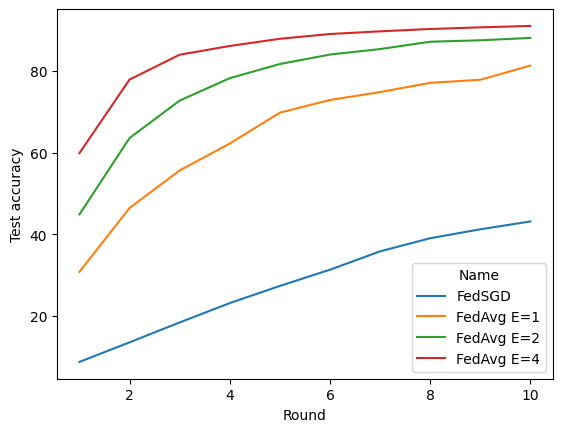

In [11]:
sns.lineplot(data=results_df, x="Round", y="Test accuracy", hue="Name")

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,8.77,FedSGD IID=True
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,13.57,FedSGD IID=True
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.44,FedSGD IID=True
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,23.18,FedSGD IID=True
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,27.38,FedSGD IID=True
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,31.35,FedSGD IID=True
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,35.85,FedSGD IID=True
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,39.06,FedSGD IID=True
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,41.25,FedSGD IID=True
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,43.17,FedSGD IID=True


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=0.01, seed=10, wall_time=[0.3, 0.8, 1.4, 1.5, 1.6, 1.8, 1.9, 2.1, 2.3, 2.9, 3.4, 3.5, 3.6, 3.9, 4.0], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], test_accuracy=[8.77, 13.57, 18.44, 23.18, 27.38, 31.35, 35.85, 39.06, 41.25, 43.17, 44.79, 46.82, 48.84, 50.45, 52.08])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.1,100,1,0.01,10,20,30.82,FedAvg IID=True
1,2,FedAvg,100,0.1,100,1,0.01,10,40,46.46,FedAvg IID=True
2,3,FedAvg,100,0.1,100,1,0.01,10,60,55.65,FedAvg IID=True
3,4,FedAvg,100,0.1,100,1,0.01,10,80,62.25,FedAvg IID=True
4,5,FedAvg,100,0.1,100,1,0.01,10,100,69.81,FedAvg IID=True
5,6,FedAvg,100,0.1,100,1,0.01,10,120,72.92,FedAvg IID=True
6,7,FedAvg,100,0.1,100,1,0.01,10,140,74.85,FedAvg IID=True
7,8,FedAvg,100,0.1,100,1,0.01,10,160,77.12,FedAvg IID=True
8,9,FedAvg,100,0.1,100,1,0.01,10,180,77.87,FedAvg IID=True
9,10,FedAvg,100,0.1,100,1,0.01,10,200,81.34,FedAvg IID=True


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.2, 0.3, 0.4, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.5, 1.8, 2.2], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], test_accuracy=[30.82, 46.46, 55.65, 62.25, 69.81, 72.92, 74.85, 77.12, 77.87, 81.34, 83.8, 84.42, 84.4, 85.51, 86.29])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.1,∞,1,0.01,10,20,12.85,FedSGD IID=False
1,2,FedSGDGradient,100,0.1,∞,1,0.01,10,40,18.42,FedSGD IID=False
2,3,FedSGDGradient,100,0.1,∞,1,0.01,10,60,18.67,FedSGD IID=False
3,4,FedSGDGradient,100,0.1,∞,1,0.01,10,80,18.58,FedSGD IID=False
4,5,FedSGDGradient,100,0.1,∞,1,0.01,10,100,24.03,FedSGD IID=False
5,6,FedSGDGradient,100,0.1,∞,1,0.01,10,120,21.95,FedSGD IID=False
6,7,FedSGDGradient,100,0.1,∞,1,0.01,10,140,24.32,FedSGD IID=False
7,8,FedSGDGradient,100,0.1,∞,1,0.01,10,160,24.77,FedSGD IID=False
8,9,FedSGDGradient,100,0.1,∞,1,0.01,10,180,28.33,FedSGD IID=False
9,10,FedSGDGradient,100,0.1,∞,1,0.01,10,200,30.70,FedSGD IID=False


RunResult(algorithm='FedSGDGradient', n=100, c=0.1, b=-1, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.6, 1.7], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], test_accuracy=[12.85, 18.42, 18.67, 18.58, 24.03, 21.95, 24.32, 24.77, 28.33, 30.7, 38.1, 36.55, 37.89, 36.4, 40.91])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.1,100,1,0.01,10,20,19.59,FedAvg IID=False
1,2,FedAvg,100,0.1,100,1,0.01,10,40,35.46,FedAvg IID=False
2,3,FedAvg,100,0.1,100,1,0.01,10,60,26.02,FedAvg IID=False
3,4,FedAvg,100,0.1,100,1,0.01,10,80,29.37,FedAvg IID=False
4,5,FedAvg,100,0.1,100,1,0.01,10,100,33.56,FedAvg IID=False
5,6,FedAvg,100,0.1,100,1,0.01,10,120,34.94,FedAvg IID=False
6,7,FedAvg,100,0.1,100,1,0.01,10,140,53.19,FedAvg IID=False
7,8,FedAvg,100,0.1,100,1,0.01,10,160,38.66,FedAvg IID=False
8,9,FedAvg,100,0.1,100,1,0.01,10,180,46.78,FedAvg IID=False
9,10,FedAvg,100,0.1,100,1,0.01,10,200,44.36,FedAvg IID=False


RunResult(algorithm='FedAvg', n=100, c=0.1, b=100, e=1, lr=0.01, seed=10, wall_time=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5], message_count=[20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300], test_accuracy=[19.59, 35.46, 26.02, 29.37, 33.56, 34.94, 53.19, 38.66, 46.78, 44.36, 60.55, 67.6, 64.47, 75.09, 73.17])


<Axes: xlabel='Round', ylabel='Test accuracy'>

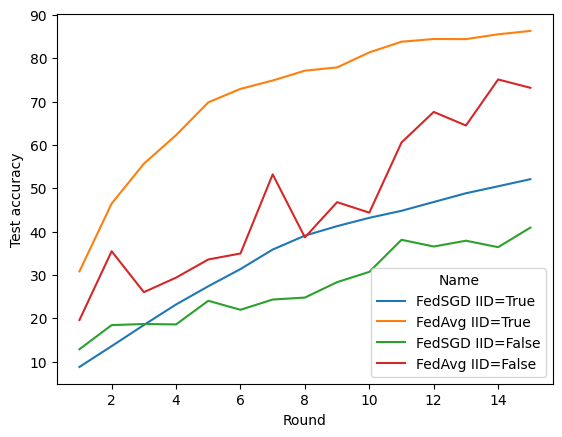

In [12]:
IIDs = [True, False]
datasets = [split(n, IID, seed) for IID in IIDs]

results_df: pd.DataFrame = pd.DataFrame()

for i, dataset in enumerate(datasets):
    params = {"lr": lr, "client_subsets": dataset, "client_fraction": c, "seed": seed}
    
    fed_sgd = FedSgdGradientServer(**params)
    result_fed_sgd = fed_sgd.run(15)
    fed_sgd_df = result_fed_sgd.as_df()
    fed_sgd_df["Name"] = f"FedSGD IID={IIDs[i]}"
    display(fed_sgd_df)
    print(result_fed_sgd)
    
    if results_df.empty:
        results_df = fed_sgd_df
    else:
        results_df = pd.concat([results_df, fed_sgd_df])
    
    fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=e)
    result_fed_avg = fedavg_server.run(15)
    fed_avg_df = result_fed_avg.as_df()
    fed_avg_df["Name"] = f"FedAvg IID={IIDs[i]}"
    display(fed_avg_df)
    print(result_fed_avg)
    results_df = pd.concat([results_df, fed_avg_df])

results_df

sns.lineplot(data=results_df, x="Round", y="Test accuracy", hue="Name")

,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.5,∞,1,0.001,10,100,6.33,FedSGD c=0.5 lr=0.001
1,2,FedSGDGradient,100,0.5,∞,1,0.001,10,200,6.48,FedSGD c=0.5 lr=0.001
2,3,FedSGDGradient,100,0.5,∞,1,0.001,10,300,6.83,FedSGD c=0.5 lr=0.001
3,4,FedSGDGradient,100,0.5,∞,1,0.001,10,400,7.05,FedSGD c=0.5 lr=0.001
4,5,FedSGDGradient,100,0.5,∞,1,0.001,10,500,7.22,FedSGD c=0.5 lr=0.001
5,6,FedSGDGradient,100,0.5,∞,1,0.001,10,600,7.27,FedSGD c=0.5 lr=0.001
6,7,FedSGDGradient,100,0.5,∞,1,0.001,10,700,7.48,FedSGD c=0.5 lr=0.001
7,8,FedSGDGradient,100,0.5,∞,1,0.001,10,800,7.82,FedSGD c=0.5 lr=0.001
8,9,FedSGDGradient,100,0.5,∞,1,0.001,10,900,8.08,FedSGD c=0.5 lr=0.001
9,10,FedSGDGradient,100,0.5,∞,1,0.001,10,1000,8.32,FedSGD c=0.5 lr=0.001


RunResult(algorithm='FedSGDGradient', n=100, c=0.5, b=-1, e=1, lr=0.001, seed=10, wall_time=[0.1, 0.3, 0.6, 0.9, 1.2, 1.4, 1.5, 1.6, 1.7, 1.9, 2.0, 2.1, 2.3, 2.4, 2.6], message_count=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], test_accuracy=[6.33, 6.48, 6.83, 7.05, 7.22, 7.27, 7.48, 7.82, 8.08, 8.32, 8.81, 9.13, 9.89, 10.43, 11.02])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedAvg,100,0.5,100,1,0.001,10,100,7.54,FedAvg c=0.5 lr=0.001
1,2,FedAvg,100,0.5,100,1,0.001,10,200,8.79,FedAvg c=0.5 lr=0.001
2,3,FedAvg,100,0.5,100,1,0.001,10,300,10.93,FedAvg c=0.5 lr=0.001
3,4,FedAvg,100,0.5,100,1,0.001,10,400,14.23,FedAvg c=0.5 lr=0.001
4,5,FedAvg,100,0.5,100,1,0.001,10,500,16.86,FedAvg c=0.5 lr=0.001
5,6,FedAvg,100,0.5,100,1,0.001,10,600,19.95,FedAvg c=0.5 lr=0.001
6,7,FedAvg,100,0.5,100,1,0.001,10,700,23.89,FedAvg c=0.5 lr=0.001
7,8,FedAvg,100,0.5,100,1,0.001,10,800,26.69,FedAvg c=0.5 lr=0.001
8,9,FedAvg,100,0.5,100,1,0.001,10,900,30.84,FedAvg c=0.5 lr=0.001
9,10,FedAvg,100,0.5,100,1,0.001,10,1000,31.56,FedAvg c=0.5 lr=0.001


RunResult(algorithm='FedAvg', n=100, c=0.5, b=100, e=1, lr=0.001, seed=10, wall_time=[0.1, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.3, 1.4, 1.5, 1.7, 1.8, 1.9], message_count=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500], test_accuracy=[7.54, 8.79, 10.93, 14.23, 16.86, 19.95, 23.89, 26.69, 30.84, 31.56, 34.17, 35.75, 38.18, 38.7, 41.26])


,Round,Algorithm,N,C,B,E,η,Seed,Message count,Test accuracy,Name
0,1,FedSGDGradient,100,0.1,∞,1,0.010,10,20,8.77,FedSGD IID=True
1,2,FedSGDGradient,100,0.1,∞,1,0.010,10,40,13.57,FedSGD IID=True
2,3,FedSGDGradient,100,0.1,∞,1,0.010,10,60,18.44,FedSGD IID=True
3,4,FedSGDGradient,100,0.1,∞,1,0.010,10,80,23.18,FedSGD IID=True
4,5,FedSGDGradient,100,0.1,∞,1,0.010,10,100,27.38,FedSGD IID=True
...,...,...,...,...,...,...,...,...,...,...,...
10,11,FedAvg,100,0.5,100,1,0.001,10,1100,34.17,FedAvg c=0.5 lr=0.001
11,12,FedAvg,100,0.5,100,1,0.001,10,1200,35.75,FedAvg c=0.5 lr=0.001
12,13,FedAvg,100,0.5,100,1,0.001,10,1300,38.18,FedAvg c=0.5 lr=0.001
13,14,FedAvg,100,0.5,100,1,0.001,10,1400,38.70,FedAvg c=0.5 lr=0.001


<Axes: xlabel='Round', ylabel='Test accuracy'>

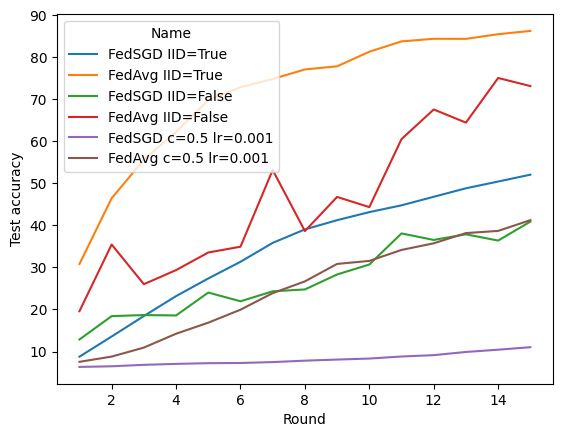

In [13]:
datasets = split(n, False, seed)

new_lr, new_c = 0.001, 0.5
params = {"lr": new_lr, "client_subsets": datasets, "client_fraction": new_c, "seed": seed}

fed_sgd = FedSgdGradientServer(**params)
result_fed_sgd = fed_sgd.run(15)
result_fed_sgd_df = result_fed_sgd.as_df()
result_fed_sgd_df["Name"] = f"FedSGD c={new_c} lr={new_lr}"
display(result_fed_sgd_df)
print(result_fed_sgd)
results_df = pd.concat([results_df, result_fed_sgd_df])

fedavg_server = FedAvgServer(**params, batch_size=b, nr_local_epochs=e)
result_fed_avg = fedavg_server.run(15)
fed_avg_df = result_fed_avg.as_df()
fed_avg_df["Name"] = f"FedAvg c={new_c} lr={new_lr}"
display(fed_avg_df)
print(result_fed_avg)
results_df = pd.concat([results_df, fed_avg_df])

display(results_df)

sns.lineplot(data=results_df, x="Round", y="Test accuracy", hue="Name")